In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data processing/preprocessed.csv')

In [3]:
X = df.drop('RainTomorrow', axis=1);

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
cluster_labels = model.fit_predict(X)

In [6]:
cluster_labels

array([3, 0, 0, ..., 3, 3, 3])

In [8]:
X['Cluster'] = cluster_labels
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Cluster
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,12,3
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,12,0
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,12,0
3,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,12,0
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,...,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,6,3
145456,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,...,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,6,3
145457,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,...,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,6,3
145458,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,6,3


In [9]:
X['Cluster'].value_counts()

Cluster
2    38187
3    33012
4    28642
1    24443
0    21176
Name: count, dtype: int64

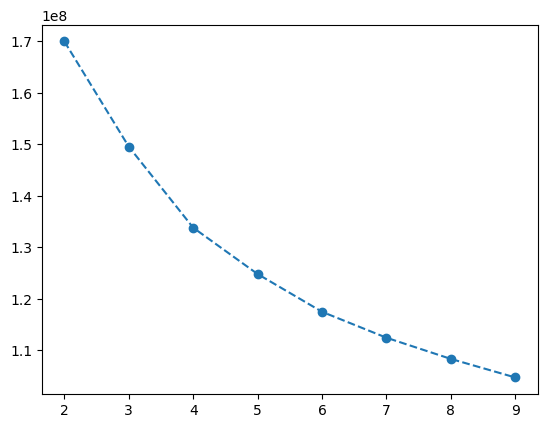

In [10]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)

    ssd.append(model.inertia_)

plt.plot(range(2, 10), ssd, 'o--')